In [1]:
import pickle
import torch

with open(f'./data/openai_gpt_final_results.pkl', 'rb') as infile:
    results_gpt = pickle.load(infile)

with open(f'./data/openai_deberta_final_results.pkl', 'rb') as infile:
    results_deberta = pickle.load(infile)

print(len(results_gpt['ids']))

1824


In [2]:
import numpy as np
import pandas as pd

questions = pd.read_csv('~/RCOG_Uncertainty_Dataset_Unanswered.csv')
print(questions.Source.unique())
part1 = ['part 1' in x.lower() for x in questions.Source]
part2 = ['part 2' in x.lower() for x in questions.Source]
sba = ['sba' in x.lower() for x in questions['Question Type']]
emq = ['emq' in x.lower() for x in questions['Question Type']]

assert len(results_gpt['ids']) == len(results_deberta['ids']) == len(part1)
print(f'''
{np.sum(part1)}
{np.sum(part2)}
{np.sum(sba)}
{np.sum(emq)}
      ''')


['SBAs for the Part 1 MRCOG' 'RCOG'
 'Part 1 MRCOG Revision Notes and Sample SBAs' 'SBAs for the Part 2 MRCOG'
 'Cambridge SBA Questions for the Part 2 MRCOG'
 'Part 2 MRCOG: 500 EMQs and SBAs' 'EMQs for the MRCOG Part 2']

411
849
1424
400
      


In [3]:
# subset results
dlld = lambda DL: [dict(zip(DL,t)) for t in zip(*DL.values())]
lddl = lambda LD: {k: [dic[k] for dic in LD] for k in LD[0]}
# deberta subsets
deberta_part1 = lddl([res for inc, res in zip(part1, dlld(results_deberta)) if inc])
deberta_part2 = lddl([res for inc, res in zip(part2, dlld(results_deberta)) if inc])
deberta_sba = lddl([res for inc, res in zip(sba, dlld(results_deberta)) if inc])
deberta_emq = lddl([res for inc, res in zip(emq, dlld(results_deberta)) if inc])

# gpt subsets
gpt_part1 = lddl([res for inc, res in zip(part1, dlld(results_gpt)) if inc])
gpt_part2 = lddl([res for inc, res in zip(part2, dlld(results_gpt)) if inc])
gpt_sba = lddl([res for inc, res in zip(sba, dlld(results_gpt)) if inc])
gpt_emq = lddl([res for inc, res in zip(emq, dlld(results_gpt)) if inc])

Metric      Accuracy Deberta Entailment    Accuracy LLM Entailment
--------  -----------------------------  -------------------------
SE                             0.408443                   0.464912
SDE                            0.400219                   0.456689
OSE                            0.430373                   0.480263
Perp                           0.411184                   0.480263


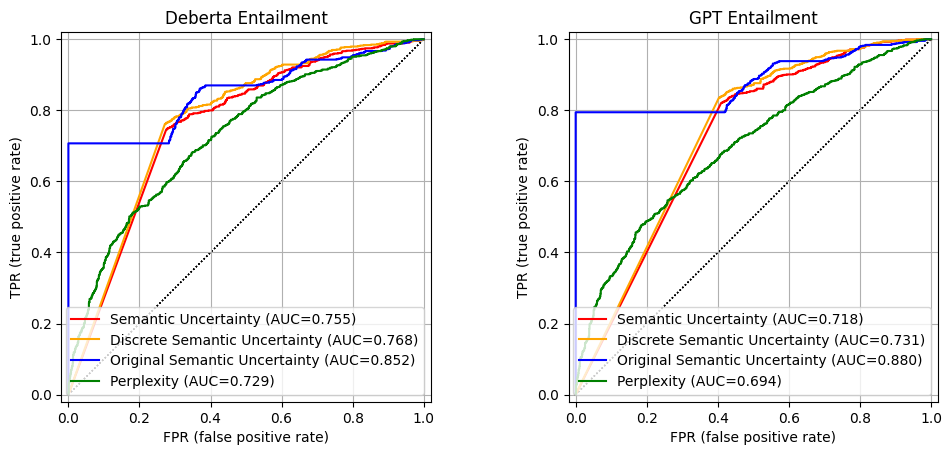

In [4]:
from roc import rocs_from_results, table_from_results
import matplotlib.pyplot as plt

table_from_results([results_deberta, results_gpt], ["Accuracy Deberta Entailment", "Accuracy LLM Entailment"])
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.8))
rocs_from_results(
    [results_deberta, results_gpt], 
    [ax1, ax2],
    ["Deberta Entailment", "GPT Entailment"]
    )

Metric      Acc Deberta ent Part1    Acc Deberta ent Part 2    Acc LLM ent Part 1    Acc LLM ent Part 2
--------  -----------------------  ------------------------  --------------------  --------------------
SE                       0.450122                  0.325088              0.515815              0.375736
SDE                      0.447689                  0.31331               0.498783              0.368669
OSE                      0.46472                   0.354535              0.513382              0.400471
Perp                     0.459854                  0.322733              0.510949              0.393404


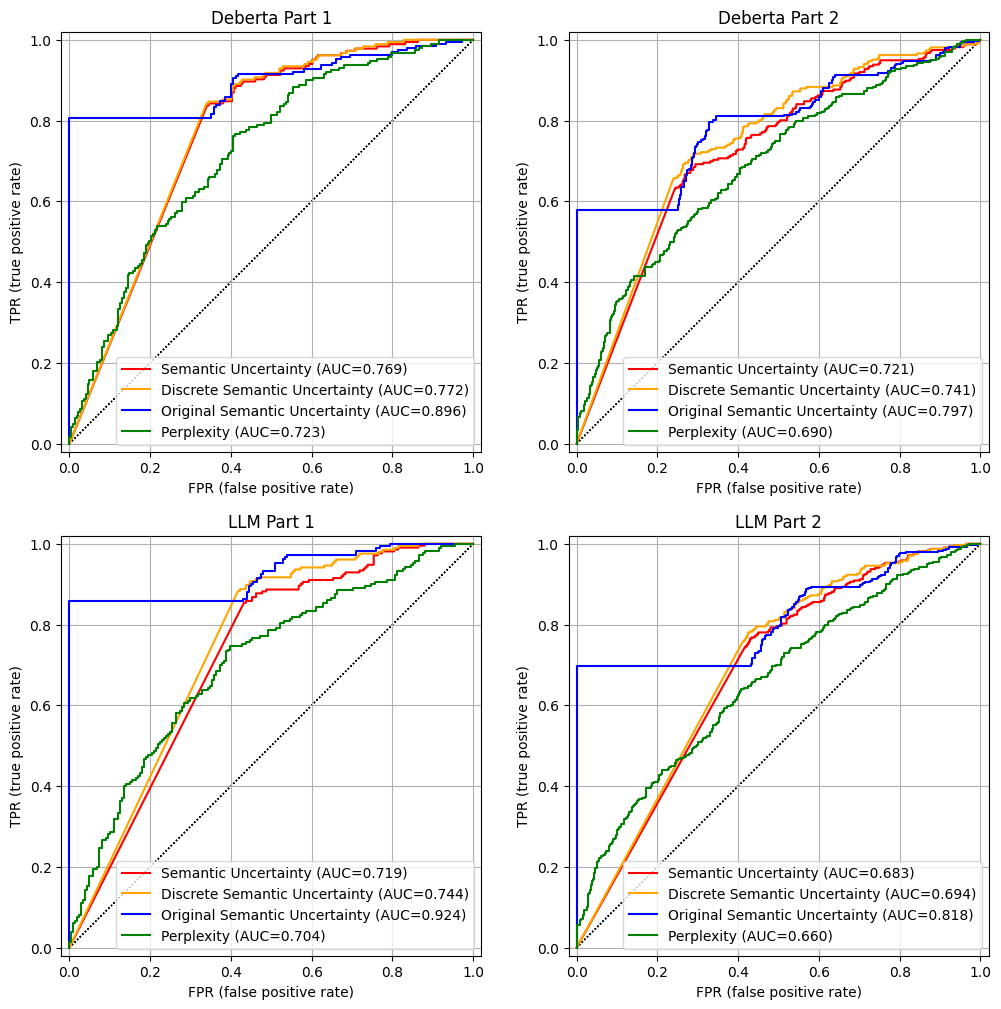

In [15]:

table_from_results(
    [deberta_part1, deberta_part2, gpt_part1, gpt_part2], 
    ["Acc Deberta ent Part1", "Acc Deberta ent Part 2", "Acc LLM ent Part 1", "Acc LLM ent Part 2"])
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
rocs_from_results(
    [deberta_part1, deberta_part2, gpt_part1, gpt_part2], 
    [ax1, ax2, ax3, ax4],
    ["Deberta Part 1", "Deberta Part 2", "LLM Part 1", "LLM Part 2"]
    )

Metric      Acc Deberta ent sba    Acc Deberta ent emq    Acc LLM ent sba    Acc LLM ent emq
--------  ---------------------  ---------------------  -----------------  -----------------
SE                     0.438904                 0.3              0.496489             0.3525
SDE                    0.430478                 0.2925           0.488764             0.3425
OSE                    0.460674                 0.3225           0.509831             0.375
Perp                   0.445225                 0.29             0.510534             0.3725


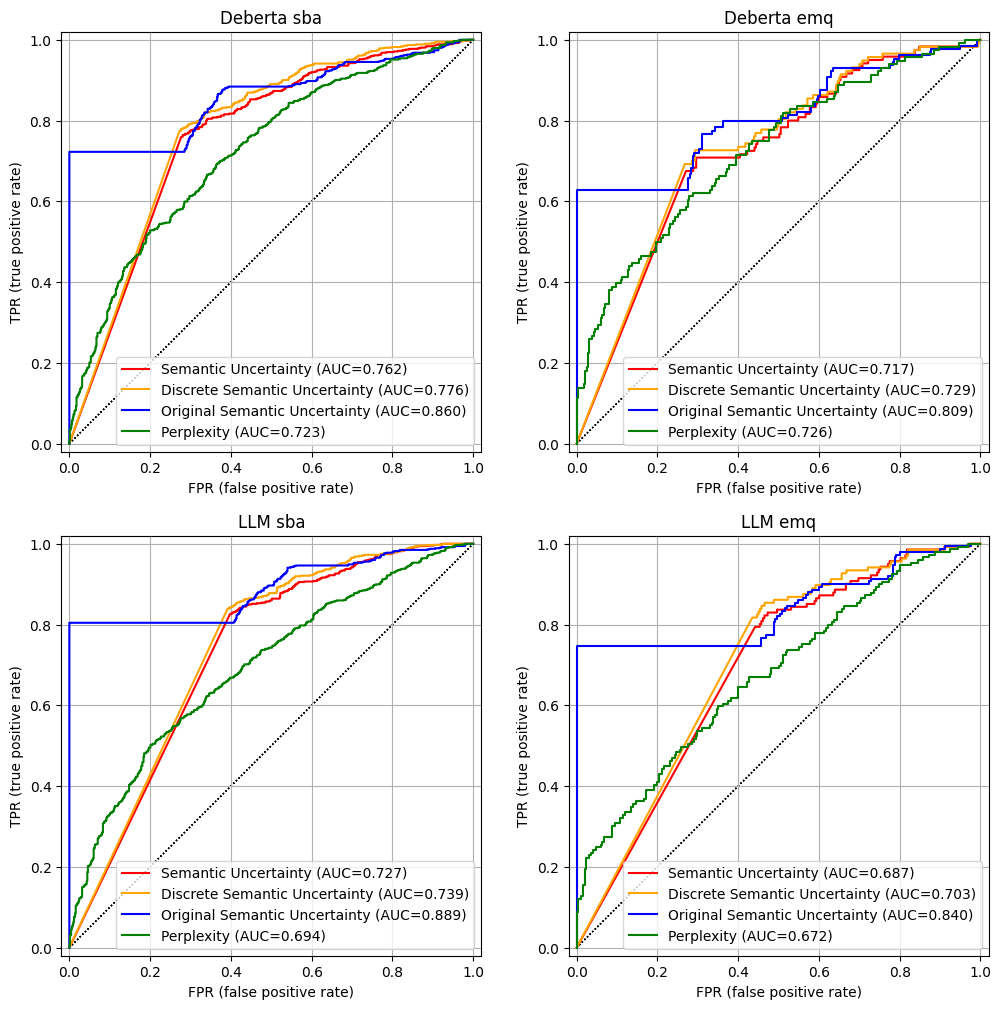

In [16]:
table_from_results(
    [deberta_sba, deberta_emq, gpt_sba, gpt_emq], 
    ["Acc Deberta ent sba", "Acc Deberta ent emq", "Acc LLM ent sba", "Acc LLM ent emq"])
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
rocs_from_results(
    [deberta_sba, deberta_emq, gpt_sba, gpt_emq], 
    [ax1, ax2, ax3, ax4],
    ["Deberta sba", "Deberta emq", "LLM sba", "LLM emq"]
    )